In [1]:
from __future__ import division

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import skbio
import scipy.stats
import statsmodels.api as sms
import statsmodels.formula.api as smf

import absloute_power.traditional as trad
import absloute_power.utils as ap


import pandas as pd
import biom

from skbio.stats.power import subsample_power

from absloute_power.traditional import calc_ttest_1

In [2]:
from matplotlib import rcParams



# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

% matplotlib inline

In [3]:
with open('/Users/jwdebelius/Repositories/Absloute-Power/data/HMP/power_005.p', 'rb') as f_:
    hmp_005_site = pickle.load(f_)
with open('/Users/jwdebelius/Repositories/Absloute-Power/data/HMP/power.p', 'rb') as f_:
    hmp_05_site = pickle.load(f_)

In [7]:
x = np.arange(0, 15.1, 0.25)

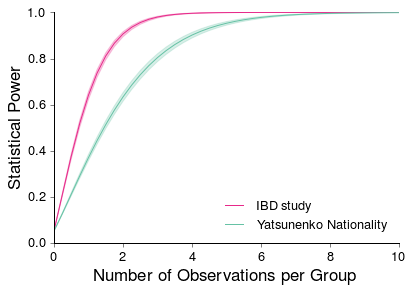

In [21]:
ax = plt.axes()
ax.fill_between(x, 
                ap.z_power(x, 3.21), 
                ap.z_power(x, 3.34), 
                color='#e7298a', alpha=0.25)
ax.plot(np.arange(0, 15.1, 0.25), 
        ap.z_power(np.arange(0, 15.1, 0.25), 3.28), 
        label='IBD study', color='#e7298a')


ax.fill_between(x, ap.z_power(x, 2.25), ap.z_power(x, 2.35), color='#66c2a5', alpha=0.25)
ax.plot(x, ap.z_power(x, 2.30), label='Yatsunenko Nationality', color='#66c2a5')

# ax.fill_between(x, ap.z_power(x, 1.39), ap.z_power(x, 1.45), color='#b3b3b3', alpha=0.25)
# ax.plot(x, ap.z_power(x, 1.42), label='Obesity BMI', color='#b3b3b3')

# ax.plot(np.arange(0, 100.1, 0.5), ap.z_power(np.arange(0, 100.1, 0.5), 4), '-', label='obesity study', color='#66c2a5')

ax.set_xlim([0, 10])

ax.set_xticks(np.arange(0, 10.1, 2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.get_xaxis().set_tick_params(direction='out')
ax.get_yaxis().set_tick_params(direction='out')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels(map(int, ax.get_xticks()), size=13)
ax.set_yticklabels(ax.get_yticks(), size=13)
ax.set_xlabel('Number of Observations per Group', size=17)
ax.set_ylabel('Statistical Power', size=17)

ax.legend(frameon=False, loc=4, fontsize=13)
ax.set_position((0.15, 0.15, 0.8, 0.8))

fig = ax.figure

fig.savefig('/Users/jwdebelius/Desktop/curve.png')

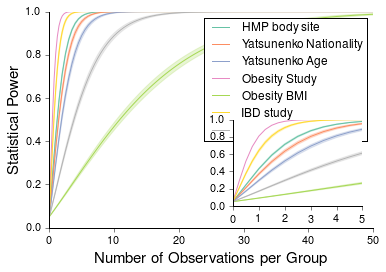

In [72]:
fig = plt.figure()
ax1 = fig.add_axes((0.125, 0.125, 0.75, 0.75))
ax2 = fig.add_axes((0.55, 0.2, 0.30, 0.30))

ax1.fill_between(x, ap.z_power(x, 2.49), ap.z_power(x, 2.55), color='#66c2a5', alpha=0.25)
ax1.plot(x, ap.z_power(x, 2.52), label='HMP body site', color='#66c2a5')
ax2.fill_between(x, ap.z_power(x, 2.49), ap.z_power(x, 2.55), color='#66c2a5', alpha=0.25)
ax2.plot(x, ap.z_power(x, 2.52), label='HMP body site', color='#66c2a5')

ax1.fill_between(x, ap.z_power(x, 2.25), ap.z_power(x, 2.35), color='#fc8d62', alpha=0.25)
ax1.plot(x, ap.z_power(x, 2.30), label='Yatsunenko Nationality', color='#fc8d62')
ax2.fill_between(x, ap.z_power(x, 2.25), ap.z_power(x, 2.35), color='#fc8d62', alpha=0.25)
ax2.plot(x, ap.z_power(x, 2.30), label='Yatsunenko Nationality', color='#fc8d62')

ax1.fill_between(x, ap.z_power(x, 1.96), ap.z_power(x, 2.05), color='#8da0cb', alpha=0.25)
ax1.plot(x, ap.z_power(x, 2.01), label='Yatsunenko Age', color='#8da0cb')
ax2.fill_between(x, ap.z_power(x, 1.96), ap.z_power(x, 2.05), color='#8da0cb', alpha=0.25)
ax2.plot(x, ap.z_power(x, 2.01), label='Yatsunenko Age', color='#8da0cb')

ax1.plot(np.arange(0, 100.1, 0.25), ap.z_power(np.arange(0, 100.1, 0.25), 4), 
        label='Obesity Study',
        color='#e78ac3')
ax2.plot(np.arange(0, 100.1, 0.25), ap.z_power(np.arange(0, 100.1, 0.25), 4), 
        label='Obesity Study',
        color='#e78ac3')

ax1.fill_between(x, ap.z_power(x, 0.82), ap.z_power(x, 0.86), color='#a6d854', alpha=0.25)
ax1.plot(x, ap.z_power(x, 0.84), label='Obesity BMI', color='#a6d854')
ax2.fill_between(x, ap.z_power(x, 0.82), ap.z_power(x, 0.86), color='#a6d854', alpha=0.25)
ax2.plot(x, ap.z_power(x, 0.84), label='Obesity BMI', color='#a6d854')

ax1.fill_between(np.arange(0, 100.1, 0.25), 
                ap.z_power(np.arange(0, 100.1, 0.25), 3.21), 
                ap.z_power(np.arange(0, 100.1, 0.25), 3.34), 
                color='#ffd92f', alpha=0.25)
ax1.plot(np.arange(0, 100.1, 0.25), 
        ap.z_power(np.arange(0, 100.1, 0.25), 3.28), 
        label='IBD study', color='#ffd92f')
ax2.fill_between(np.arange(0, 100.1, 0.25), 
                ap.z_power(np.arange(0, 100.1, 0.25), 3.21), 
                ap.z_power(np.arange(0, 100.1, 0.25), 3.34), 
                color='#ffd92f', alpha=0.25)
ax2.plot(np.arange(0, 100.1, 0.25), 
        ap.z_power(np.arange(0, 100.1, 0.25), 3.28), 
        label='IBD study', color='#ffd92f')

ax1.fill_between(x, ap.z_power(x, 1.39), ap.z_power(x, 1.45), color='#b3b3b3', alpha=0.25)
ax1.plot(x, ap.z_power(x, 1.42), label='Obesity BMI', color='#b3b3b3')
ax2.fill_between(x, ap.z_power(x, 1.39), ap.z_power(x, 1.45), color='#b3b3b3', alpha=0.25)
ax2.plot(x, ap.z_power(x, 1.42), label='Obesity BMI', color='#b3b3b3')

ax1.set_xlim([0, 50])
ax2.set_xlim([0, 5])

ax2.set_yticklabels('')

ax1.set_xticks(np.arange(0, 50.1, 10))
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.get_xaxis().set_tick_params(direction='out')
ax1.get_yaxis().set_tick_params(direction='out')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticklabels(map(int, ax1.get_xticks()), size=11)
ax1.set_yticklabels(ax1.get_yticks(), size=11)
ax1.set_xlabel('Number of Observations per Group', size=15)
ax1.set_ylabel('Statistical Power', size=15)

ax2.set_xticks(np.arange(0, 5.1, 1))
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.get_xaxis().set_tick_params(direction='out')
ax2.get_yaxis().set_tick_params(direction='out')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xticklabels(map(int, ax2.get_xticks()), size=11)
ax2.set_yticklabels(ax2.get_yticks(), size=11)

ax1.legend()

fig.savefig('/Users/jwdebelius/Desktop/all_var_power.pdf')